In [2]:
import pickle
with open('/content/drive/My Drive/scores/mean_scores.pkl', 'rb') as f:
    mean_scores = pickle.load(f)

with open('/content/drive/My Drive/scores/std_scores.pkl', 'rb') as f:
    std_scores = pickle.load(f)

In [25]:
print(len(mean_scores))
print(len(std_scores))

epochs = []
for i,j in enumerate(mean_scores):
      epochs.append(i*10)

print(epochs)

61
61
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600]


In [8]:
from pandas import DataFrame
   
Data = {'mean': mean_scores,
        'std': std_scores,
        'epochs': epochs
       }
  
df = DataFrame(Data,columns=['epochs', 'mean', 'std'])
print (df)

    epochs      mean       std
0        0  1.054229  0.002537
1        1  2.771921  0.081430
2        2  3.775663  0.144689
3        3  3.999910  0.128809
4        4  3.974171  0.169347
..     ...       ...       ...
56      56  4.538744  0.166217
57      57  4.400996  0.132746
58      58  4.458466  0.139832
59      59  4.347839  0.160487
60      60  4.530726  0.146185

[61 rows x 3 columns]


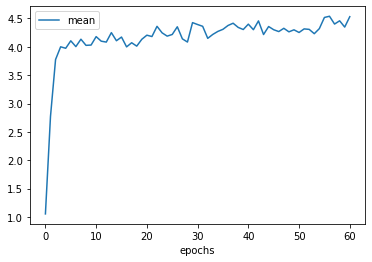

In [10]:
df.plot(x ='epochs', y=['mean'], kind = 'line')

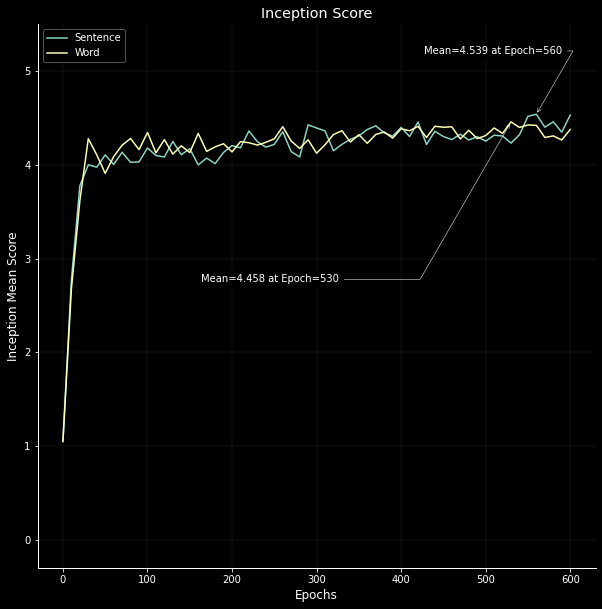

In [66]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('dark_background')

y = np.array(mean_scores)
y2 = np.array(wmean_scores)
x = np.array(epochs)


fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(x,y, label = "Sentence")
ax.plot(x,y2, label = "Word")

def annot_max(x,y,left = 0.94, top = 0.96, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "Mean={:.3f} at Epoch={:.0f}".format(ymax, xmax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="k", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(left,top), **kw)

ax.set_ylim(-0.3,5.5)
annot_max(x,y)
annot_max(x,y2 , top =0.54, left=0.54)
plt.title("Inception Score")
plt.xlabel('Epochs')
plt.ylabel('Inception Mean Score') 
plt.legend(loc="upper left")


#removing top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#adds major gridlines
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)


plt.savefig('test.png')
plt.show()

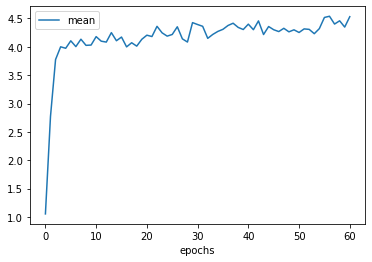

In [28]:
meanplt = df.plot(x ='epochs', y='mean', kind = 'line')

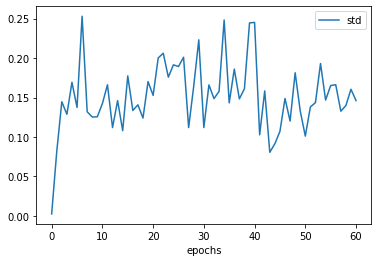

In [29]:
std_plt = df.plot(x ='epochs', y='std', kind = 'line')

In [ ]:
meanfig = meanplt.get_figure()
std_fig = std_plt.get_figure()
meanfig.savefig("inception_mean.png")
std_fig.savefig("inception_std.png")

In [63]:
import pickle
with open('/content/word/mean_scores.pkl', 'rb') as f:
    wmean_scores = pickle.load(f)

with open('/content/word/std_scores.pkl', 'rb') as f:
    wstd_scores = pickle.load(f)